<a href="https://colab.research.google.com/github/Todmount/KHAI_MLcourse/blob/PR10/Task_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практика №10
## Поліноміальна регресія

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

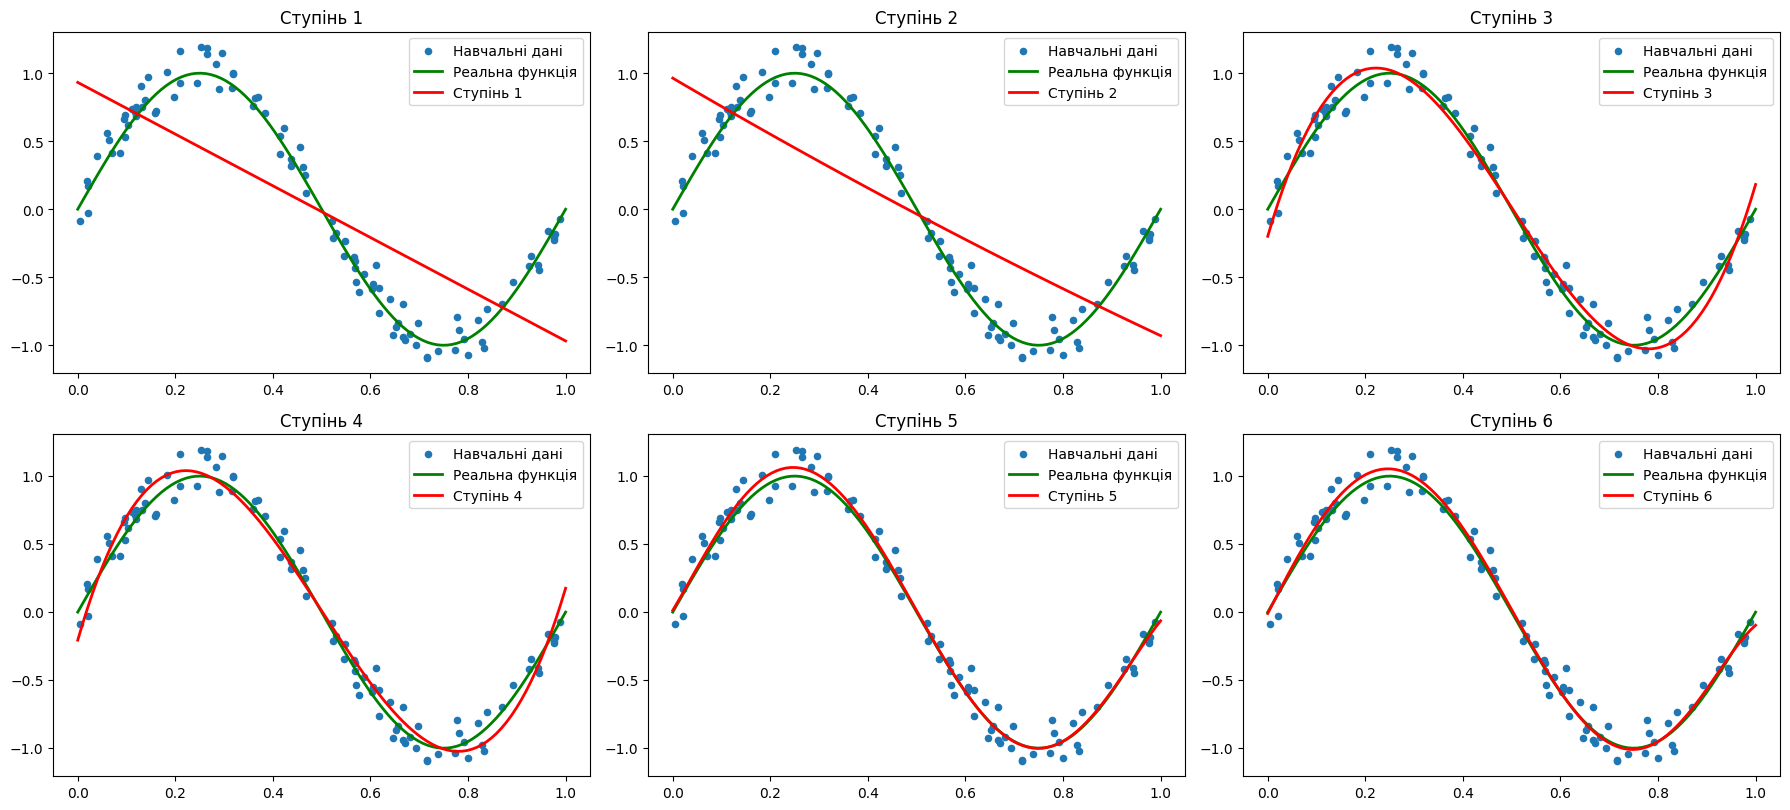

In [29]:
# Генерація даних
np.random.seed(0)
X_train = np.sort(np.random.rand(100))
y_train = np.sin(2 * np.pi * X_train) + np.random.normal(0, 0.1, 100)

# Генерація тестових даних
X_test = np.linspace(0, 1, 100)
y_true = np.sin(2 * np.pi * X_test)

# Візуалізація прогнозу та даних для різних ступенів поліноміальних функцій
degrees = [1, 2, 3, 4, 5, 6]

plt.figure(figsize=(18, 12))

for i, degree in enumerate(degrees):
    # Отримання поліноміальних ознак
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly_features.fit_transform(X_train.reshape(-1, 1))

    # Навчання моделі лінійної регресії
    model = LinearRegression()
    model.fit(X_poly, y_train)

    # Прогноз на тестових даних
    X_test_poly = poly_features.transform(X_test.reshape(-1, 1))
    y_pred = model.predict(X_test_poly)

    # Розрахунок метрик
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    # Виведення результатів
    plt.subplot(3, 3, i + 1)
    plt.scatter(X_train, y_train, s=20, label='Навчальні дані')
    plt.plot(X_test, y_true, label='Реальна функція', linewidth=2, color='green')
    plt.plot(X_test, y_pred, label=f'Ступінь {degree}', linewidth=2, color='red')
    plt.title(f'Ступінь {degree}
MSE: {mse:.5f}, R2: {r2:.5f}')
    plt.legend()

plt.tight_layout()
plt.show()